# 20/12/2022

# Deep Learning va Computer Vision 

# Mask Detection

# Muallif: Farrux Sotivoldiyev

#### `Kutubxonalar`

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import preprocess_input

#### `O'qitilgan modelni chaqirib olish`

In [3]:
model = tf.keras.models.load_model("train_mask_detection2.h5")

#### `Yuzni aniqlovchi Cascad modelini chaqirib olish`

In [14]:
face = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

#### `Yuzni topish va uni qirqib modelga jo'natish` 

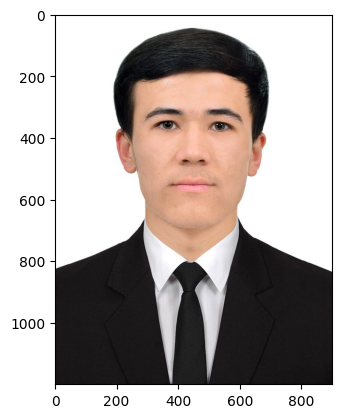

In [25]:
my_photo = plt.imread("farruxbek_2.jpg")
plt.imshow(my_photo)

In [11]:
gray = cv2.cvtColor(my_photo,cv2.COLOR_RGB2GRAY)

In [15]:
kordinatalar = face.detectMultiScale(gray,1.1,4)
for x,y,w,h in kordinatalar:
    a_gray = gray[y:y+h,x:x+w]
    a_my_photo =  my_photo[y:y+h,x:x+w]
    cv2.rectangle(my_photo,(x,y),(x+w,y+h),(255,0,0),2)

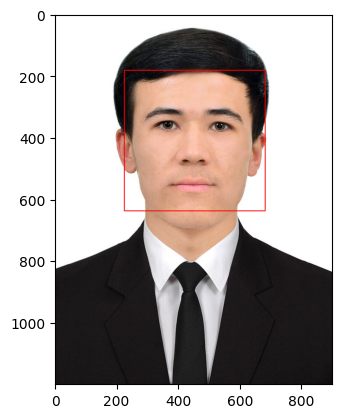

In [16]:
plt.imshow(my_photo)

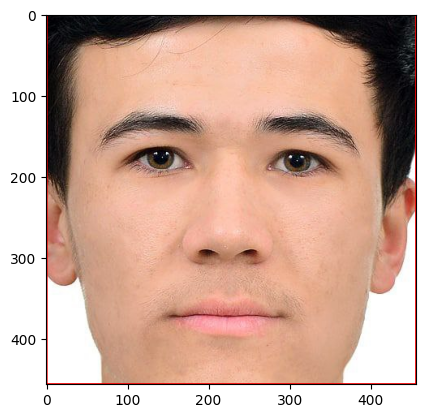

In [17]:
plt.imshow(a_my_photo)

In [18]:
rasm = cv2.resize(a_my_photo,(224,224))
rasm = np.expand_dims(rasm,0)
rasm = preprocess_input(rasm)

In [19]:
model.predict(rasm) #0.5 dan yuqorisi Maskasiz,kichigi Maskali

1/1 [==============================] - 18s 18s/step


array([[1.]], dtype=float32)

#### `Aosiy qism` 

In [24]:
video = cv2.VideoCapture(0)

while video.isOpened():
    i,kadr = video.read()
    gray = cv2.cvtColor(kadr,cv2.COLOR_RGB2GRAY)
    kordinatalar = face.detectMultiScale(gray,minSize=(100,100),maxSize=(500,500))
    if len(kordinatalar)!=0:
        for x,y,w,h in kordinatalar:
            a_gray = gray[y:y+h,x:x+w]
            a_my_photo =  kadr[y:y+h,x:x+w]
            cv2.rectangle(kadr,(x,y),(x+w,y+h),(255,0,0),2)

            true_rasm = cv2.resize(a_my_photo,(224,224))
            true_rasm = np.expand_dims(true_rasm,0)
            true_rasm = preprocess_input(true_rasm)
            model_predict = model.predict(true_rasm, verbose=0)
            title = "Unmasked" if model_predict>=0.5 else "Masked"
    else:
        title = "Face not found!" 
        
    cv2.putText(kadr,title,(x,y),cv2.FONT_HERSHEY_PLAIN,3,(0,0,255),3)
    
    cv2.imshow("Mask detection by Farruxbek",kadr)
    if cv2.waitKey(40) & 0xFF==ord("q"):
        break
        
video.release()
cv2.destroyAllWindows()